## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

Stakeholder: Real Estate Investment Firm interested in buying houses, improving them, and selling them.
Target: price

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [15]:
df.sewer_system.value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [34]:
df.price.describe()

count    3.015500e+04
mean     1.108536e+06
std      8.963857e+05
min      2.736000e+04
25%      6.480000e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

To do:
-Filter outliers
-Dummy out categoricals

Drop(unchangeable): id, date, sqft_lot, waterfront, greenbelt, nuisance, view, yr_built, yr_renovated, address, lat, long
Categorical (strings): condition, grade, heat_source, sewer_system, 
Categorical (nums): bedrooms, bathrooms, floors,
Nums: price, sqft_living, sqft_above, sqft_basement, sqft_garage, sqft_patio

In [16]:
df_nums = df[['price', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']]

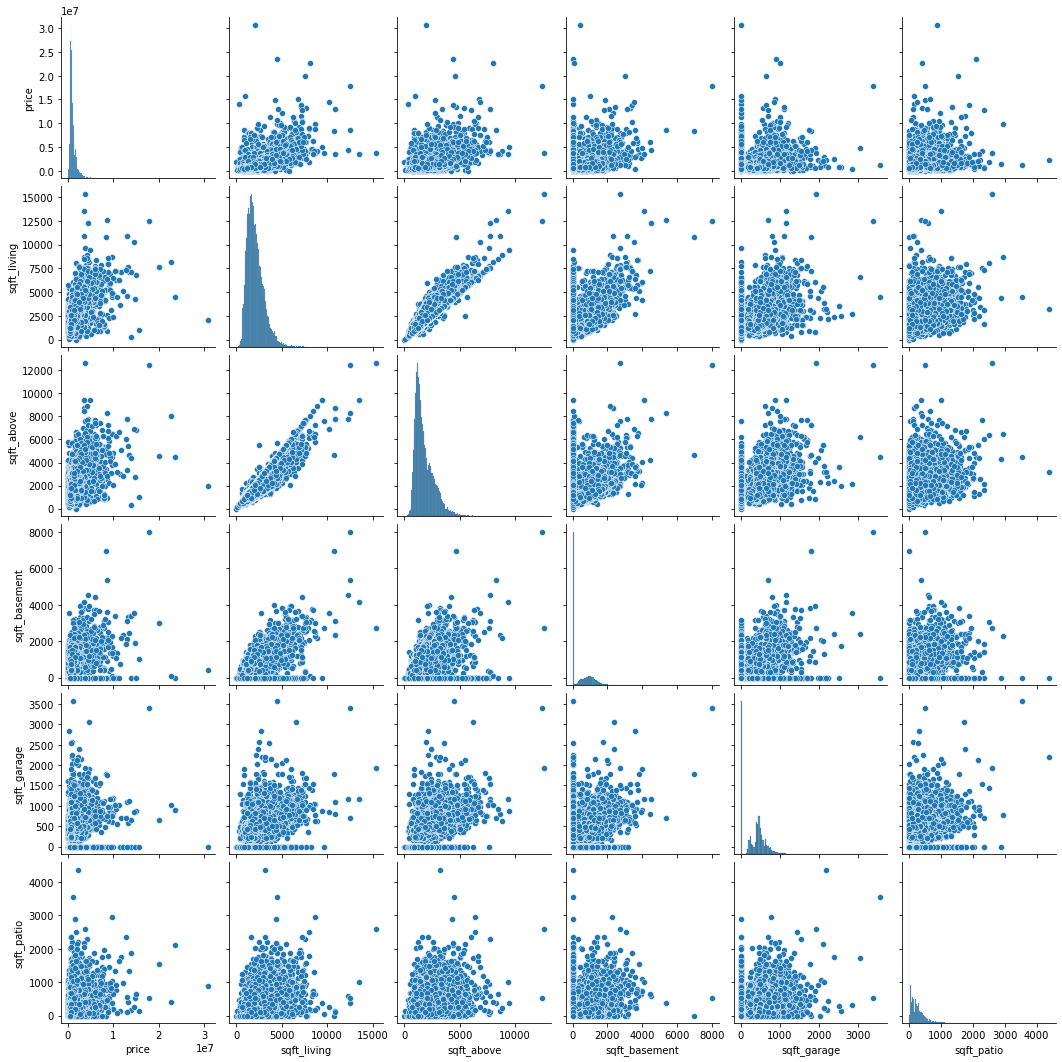

In [22]:
# Making pairplot out of strictly numeric variables (square footage)
sns.pairplot(df_nums)

<AxesSubplot:>

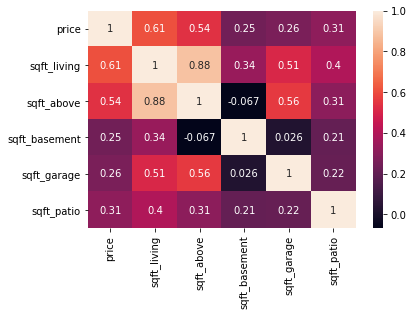

In [24]:
# Making correlation heatmap out of numeric variables
sns.heatmap(df_nums.corr(), annot = True)


Observations:
    -price seems to be right skewed (log scale)
    -sqft_living has the highest correlation with price out of all sqft variables
    -above has incredibly high corr with living (multicollinearity)
    -garage has high correlation with living as well, and basement and patio also have significant corr with living
    

Making model with price as target and only sqft_living as variable

In [26]:
model = sm.OLS(df['price'], sm.add_constant(df['sqft_living'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:11:48   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations of first model:
    - R-Squared of 0.370 is okay but not great
    - P value much smaller than alpha=0.5, meaning significant
    - For every square foot increase in living space, price inc by 560

New model with our target(price) log-scaled

In [30]:
model2 = sm.OLS(np.log(df['price']), sm.add_constant(df['sqft_living'])).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.898e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:20:00   Log-Likelihood:                -19148.
No. Observations:               30155   AIC:                         3.830e+04
Df Residuals:                   30153   BIC:                         3.832e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9491      0.006   2062.042      0.000      12.937      12.961
sqft_living     0.0004    2.7e-06    137.785      0.000       0.000       0.000
==============================================================================
Omnibus:                     5903.116   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49981.952
Skew:                          -0.706   Prob(JB):                         0.00
Kurtosis:                       9.147   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations:
    - R-Squared just slightly better at 0.386

In [41]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64